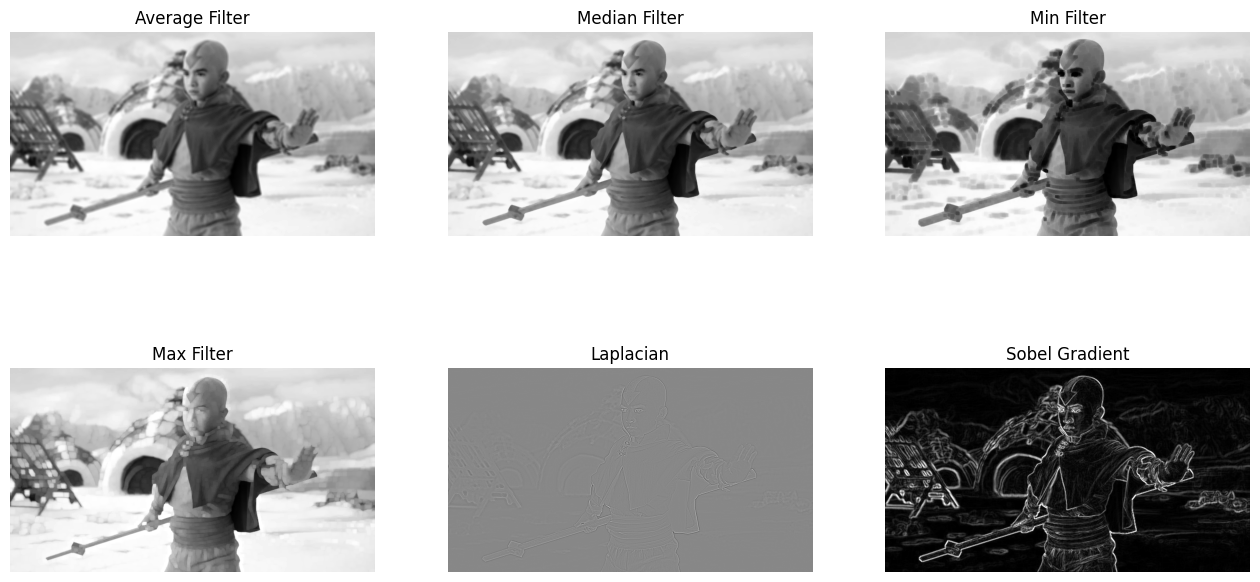

In [78]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Fungsi untuk menghitung citra rata-rata dari sebuah array citra
def average_filter(image, kernel_size):
    return cv2.blur(image, (kernel_size, kernel_size))

# Fungsi untuk menghitung citra median dari sebuah array citra
def median_filter(image, kernel_size):
    return cv2.medianBlur(image, kernel_size)

# Fungsi untuk menghitung citra minimum dari sebuah array citra
def min_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

# Fungsi untuk menghitung citra maksimum dari sebuah array citra
def max_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)

# Fungsi untuk menghitung citra gradien Laplacian
def laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F)

# Fungsi untuk menghitung citra gradien Sobel
def sobel_gradient(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    gradient = cv2.addWeighted(cv2.convertScaleAbs(grad_x), 0.5, cv2.convertScaleAbs(grad_y), 0.5, 0)
    return gradient

# Fungsi untuk memplot citra
def plot_image(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load citra
image_path = '/content/avatar.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Menampilkan semua gambar dalam satu tampilan grid
fig, axes = plt.subplots(2, 3, figsize=(16, 8))  # Ubah menjadi grid 2x3

# Memplot citra hasil proses dalam layout 2x3
images = [
    average_filter(image, 5),
    median_filter(image, 5),
    min_filter(image, 5),
    max_filter(image, 5),
    laplacian(image),
    sobel_gradient(image)
]

titles = [
    'Average Filter',
    'Median Filter',
    'Min Filter',
    'Max Filter',
    'Laplacian',
    'Sobel Gradient'
]

for i, ax in enumerate(axes.flat):
    if i < len(images):  # Pastikan kita tidak mencoba untuk mengakses citra yang tidak ada
        ax.imshow(images[i], cmap='gray')
        ax.set_title(titles[i])
        ax.axis('off')
    else:
        ax.axis('off')  # Matikan sumbu jika tidak ada citra untuk ditampilkan

plt.show()



